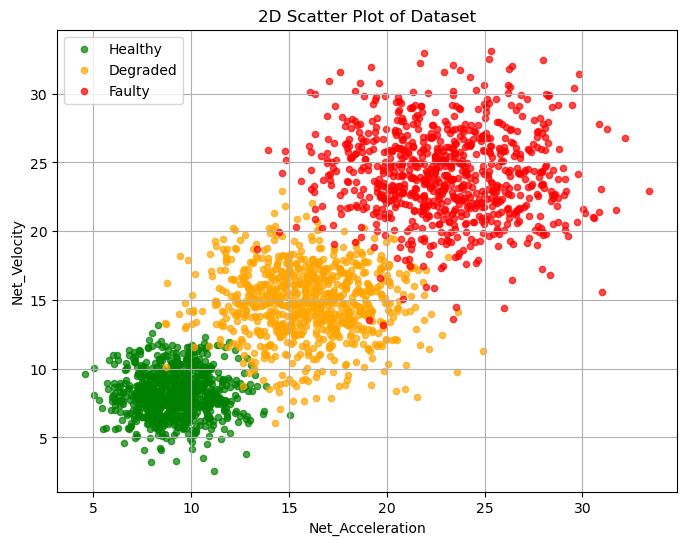

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
# Replace 'your_dataset.csv' with your file path
df = pd.read_excel("CNC_health_dataset_low_noise.xlsx")

# Assuming your dataset has columns: 'Feature1', 'Feature2', 'Label'
# If column names are different, change them accordingly
features = ['Net_Acceleration', 'Net_Velocity']
label_col = "Machine_Health"

# Scatter plot
colors = {'Healthy':'green', 'Degraded':'orange', 'Faulty':'red'}

plt.figure(figsize=(8,6))

for label in df[label_col].unique():
    subset = df[df[label_col] == label]
    plt.scatter(subset[features[0]], subset[features[1]], 
                label=label, c=colors[label], s=20, alpha=0.7)

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('2D Scatter Plot of Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
# =============================
# CNC Machine Health Prediction
# =============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt

# 1️⃣ Load your Excel dataset
df = pd.read_excel("CNC_health_dataset_low_noise.xlsx")  # ← your saved dataset name

# Check first few rows
print(df.head())

# 2️⃣ Define input features (X) and output label (y)
X = df[['Net_Acceleration', 'Net_Velocity']]   # two input features
y = df['Machine_Health']                       # target variable

# 3️⃣ Encode string labels (Healthy → 0, Degraded → 1, Faulty → 2)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# 4️⃣ Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 5️⃣ Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Train a Random Forest Classifier
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X_train_scaled, y_train)

# 7️⃣ Evaluate model
y_pred = clf.predict(X_test_scaled)

print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8️⃣ Save trained model & scaler
joblib.dump({'model': clf, 'scaler': scaler, 'encoder': encoder}, 'cnc_health_predictor.joblib')
print("\ncnc_health_predictor.joblib")

# 9️⃣ Optional: Plot feature importance


print("accuracy:-", accuracy_score(y_test,y_pred))

   Net_Acceleration  Net_Velocity Machine_Health
0          9.357493      9.079418        Healthy
1          8.315633      7.065216        Healthy
2          9.686975      9.152804        Healthy
3         10.720180      8.117690        Healthy
4          8.732547      6.577608        Healthy

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       160
           1       0.99      0.97      0.98       160
           2       0.99      0.99      0.99       160

    accuracy                           0.98       480
   macro avg       0.98      0.98      0.98       480
weighted avg       0.98      0.98      0.98       480

Confusion Matrix:
 [[157   1   2]
 [  5 155   0]
 [  1   0 159]]

cnc_health_predictor.joblib
accuracy:- 0.98125


In [48]:
pip install m2cgen


   ---------------------------------------- 0.0/92.2 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/92.2 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/92.2 kB ? eta -:--:--
   ----------------- ---------------------- 41.0/92.2 kB 326.8 kB/s eta 0:00:01
   ---------------------------------------- 92.2/92.2 kB 585.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [68]:
c_code = m2c.export_to_c(clf)

with open("multinomial_model.c", "w") as f:
    f.write(c_code)

print("C code generated successfully!")

C code generated successfully!


In [70]:
clf.classes_

array([0, 1, 2])